## Importing the relevant libraries

Dataset: https://www.kaggle.com/datasets/farhanmd29/50-startups

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

****
### Setting the style and colors

THEME


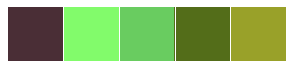

In [2]:
#Lets set the style of all our seaborn based plots
plt.style.use(['ggplot'])
# Setting the theme of our plots
theme = ["#4a2e36", "#82fB6B","#69cc60","#536d19","#99a129"]
print('THEME')
sns.palplot(sns.color_palette(theme))
palette= sns.set_palette(sns.color_palette(theme))

****
### Load dataset and preprocess

In [3]:
# Load the data from a .csv in the same folder
data = pd.read_csv('50_Startups.csv')

# Let's explore the top 5 rows of the df
data.head().style.background_gradient(cmap='Greens',axis=None)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.200000,136897.800000,471784.100000,New York,192261.830000
1,162597.700000,151377.590000,443898.530000,California,191792.060000
2,153441.510000,101145.550000,407934.540000,Florida,191050.390000
3,144372.410000,118671.850000,383199.620000,New York,182901.990000
4,142107.340000,91391.770000,366168.420000,Florida,166187.940000


In [4]:
# check for numeric data
data.describe().T.style.background_gradient(cmap='Greens',axis=None)

,count,mean,std,min,25%,50%,75%,max
R&D Spend,50.000000,73721.615600,45902.256482,0.000000,39936.370000,73051.080000,101602.800000,165349.200000
Administration,50.000000,121344.639600,28017.802755,51283.140000,103730.875000,122699.795000,144842.180000,182645.560000
Marketing Spend,50.000000,211025.097800,122290.310726,0.000000,129300.132500,212716.240000,299469.085000,471784.100000
Profit,50.000000,112012.639200,40306.180338,14681.400000,90138.902500,107978.190000,139765.977500,192261.830000


***
### Missing values

In [5]:
# https://www.kaggle.com/code/willkoehrsen/start-here-a-gentle-introduction#Exploratory-Data-Analysis
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns
    
# Missing values statistics
missing_values = missing_values_table(data)
missing_values.head(20)

Your selected dataframe has 5 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


**No missing Values**

In [6]:
data.dtypes.value_counts()

float64    4
object     1
dtype: int64

In [7]:
data.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

State    3
dtype: int64

***
### Exploring PDFs

In [8]:
data.select_dtypes([np.number]).columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit'], dtype='object')

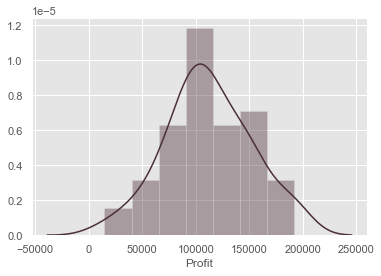

In [9]:
# A great step in the data exploration is to display the probability distribution function (PDF) of a variable
# The PDF will show us how that variable is distributed 
# This makes it very easy to spot anomalies, such as outliers
# The PDF is often the basis on which we decide whether we want to transform a feature
sns.distplot(data['Profit'])

In [10]:
bb=data['Profit'].values

We can see that in this dataset, we have normal distirbuation and therefore, we do not have to deal with outliers.<br>
But for the specific task and project, we will do all the initial steps.

### Dealing with outliers

When we deal with outliers, the best practice is to use the 99th precentile of the variable we want to check.<br>
Then, we can create new table without the outliers to normalize our data.

In [11]:
# Let's declare a variable that will be equal to the 99th percentile of the 'Price' variable
q = data['Profit'].quantile(0.99)
# Then we can create a new df, with the condition that all prices must be below the 99 percentile of 'Price'
data_1 = data[data['Profit']<q]
# In this way we have essentially removed the top 1% of the data about 'Price'
data_1.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
R&D Spend,49.0,NaN,NaN,NaN,71851.664898,44412.105864,0.0,38558.51,72107.6,100671.96,162597.7
Administration,49.0,NaN,NaN,NaN,121027.228163,28217.174418,51283.14,103057.49,122616.84,145077.58,182645.56
Marketing Spend,49.0,NaN,NaN,NaN,205703.48551,117562.764197,0.0,127716.82,210797.67,298664.47,443898.53
State,49,3,California,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Profit,49.0,NaN,NaN,NaN,110374.900612,39006.799802,14681.4,89949.14,107404.34,134307.35,191792.06


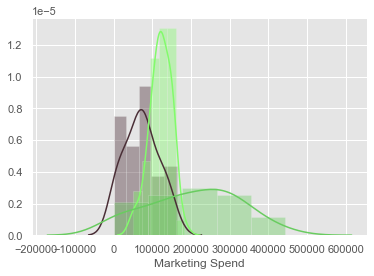

In [12]:
# for this variable we can see it looks normal and therefore we won't test it.
sns.distplot(data_1['R&D Spend'])
sns.distplot(data_1['Administration'])
sns.distplot(data_1['Marketing Spend'])

We can split the graphs but we can see also all together that look normal

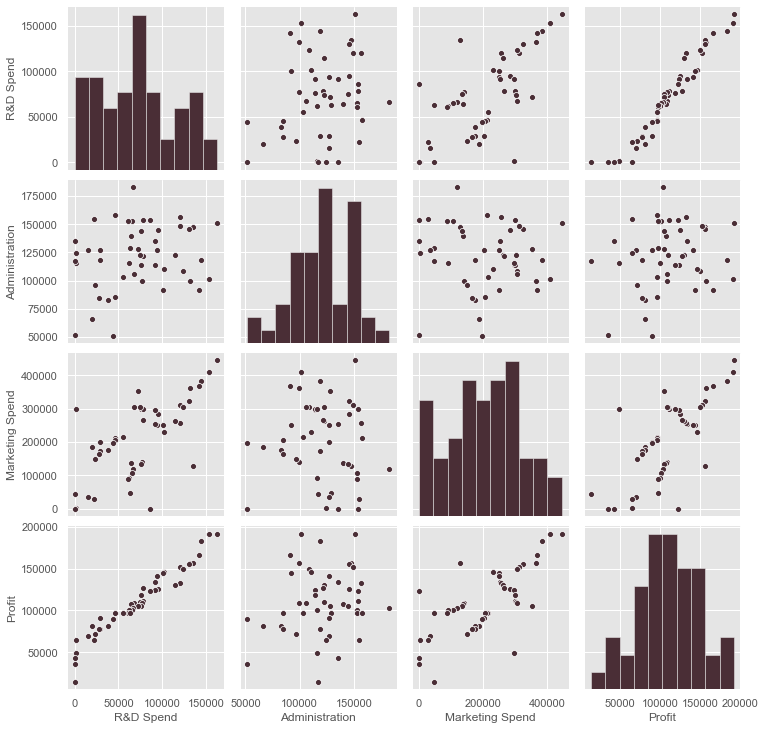

In [13]:
sns.pairplot(data_1)
plt.show()

In [14]:
data_cleaned = data_1.reset_index(drop=True)

In [15]:
data_cleaned.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
R&D Spend,49.0,NaN,NaN,NaN,71851.664898,44412.105864,0.0,38558.51,72107.6,100671.96,162597.7
Administration,49.0,NaN,NaN,NaN,121027.228163,28217.174418,51283.14,103057.49,122616.84,145077.58,182645.56
Marketing Spend,49.0,NaN,NaN,NaN,205703.48551,117562.764197,0.0,127716.82,210797.67,298664.47,443898.53
State,49,3,California,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Profit,49.0,NaN,NaN,NaN,110374.900612,39006.799802,14681.4,89949.14,107404.34,134307.35,191792.06


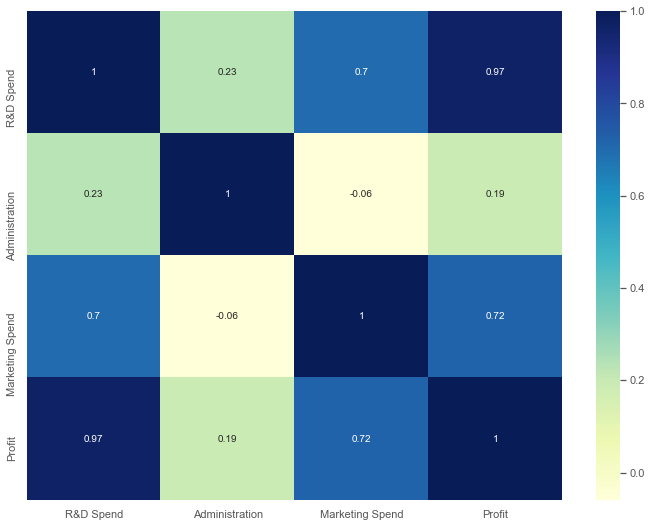

In [16]:
plt.figure(figsize=(12, 9));
correlation_matrix = data_cleaned.corr().round(2);
sns.heatmap(correlation_matrix, cmap="YlGnBu", annot=True);

**There are not two features which more correlated**

***
### Multicollinearity

In [17]:
data_cleaned.columns.values

array(['R&D Spend', 'Administration', 'Marketing Spend', 'State',
       'Profit'], dtype=object)

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = data_cleaned[['R&D Spend','Marketing Spend', 'Administration']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns

In [19]:
vif

,VIF,Features
0,7.865836,R&D Spend
1,7.104986,Marketing Spend
2,4.053874,Administration


***
### Create Dummies

In [20]:
# To include the categorical data in the regression, let's create dummies
# There is a very convenient method called: 'get_dummies' which does that seemlessly
# It is extremely important that we drop one of the dummies, alternatively we will introduce multicollinearity
data_with_dummies = pd.get_dummies(data_cleaned, drop_first=True)

In [21]:
# Here's the result
data_with_dummies.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,162597.70,151377.59,443898.53,191792.06,0,0
1,153441.51,101145.55,407934.54,191050.39,1,0
2,144372.41,118671.85,383199.62,182901.99,0,1
3,142107.34,91391.77,366168.42,166187.94,1,0
4,131876.90,99814.71,362861.36,156991.12,0,1


***
### Declare the inputs and the targets

In [22]:
data_preprocessed = data_with_dummies

In [23]:
# The target(s) (dependent variable) is 'log price'
targets = data_preprocessed['Profit']

# The inputs are everything BUT the dependent variable, so we can simply drop it
inputs = data_preprocessed.drop(['Profit'],axis=1)

***
## Feature selection

Full documentation: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_regression.html

In [24]:
from sklearn.feature_selection import f_regression

In [25]:
f_regression(inputs,targets)

# There are two output arrays
# The first one contains the F-statistics for each of the regressions
# The second one contains the p-values of these F-statistics

(array([7.60337988e+02, 1.68655174e+00, 5.16213354e+01, 1.10389677e+00,
        3.55852166e-02]),
 array([1.13385465e-30, 2.00391966e-01, 4.28940111e-09, 2.98784909e-01,
        8.51186827e-01]))

In [26]:
# Since we are more interested in the latter (p-values), we can just take the second array
p_values = f_regression(inputs,targets)[1]
p_values

array([1.13385465e-30, 2.00391966e-01, 4.28940111e-09, 2.98784909e-01,
       8.51186827e-01])

In [27]:
# To be able to quickly evaluate them, we can round the result to 3 digits after the dot
p_values.round(3)

array([0.   , 0.2  , 0.   , 0.299, 0.851])


#### Check for highly correlated features

In [28]:
columns = np.full((inputs.corr().shape[0],), True, dtype=bool)
for i in range(inputs.corr().shape[0]):
    for j in range(i+1, inputs.corr().shape[0]):
        if inputs.corr().iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = inputs.columns[columns]
inputs = inputs[selected_columns]

In [29]:
inputs.columns.values

array(['R&D Spend', 'Administration', 'Marketing Spend', 'State_Florida',
       'State_New York'], dtype=object)

**No highly correlated features which needs to be removed**

#### Check for VarianceThreshold

In [30]:
from sklearn.feature_selection import VarianceThreshold

In [31]:
treshhold = VarianceThreshold(threshold=0)

In [32]:
treshhold.fit(inputs)

VarianceThreshold(threshold=0)

In [33]:
treshhold.get_support()

array([ True,  True,  True,  True,  True])

In [34]:
# !pip install featurewiz

#### Another check using featurewiz

In [35]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from featurewiz import featurewiz

Imported featurewiz. Version = 0.1.32. Now with dask, XGBoost-GPU and feather-format.
outputs = featurewiz(dataname, target, corr_limit=0.70, verbose=2, sep=',', 
		header=0, test_data='',feature_engg='', category_encoders='',
		dask_xgboost_flag=False, nrows=None)
Create new features via 'feature_engg' flag : ['interactions','groupby','target']
                                


############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
**INFO: featurewiz can now read feather formatted files. Loading train data...
    Shape of your Data Set loaded: (49, 6)
    Loaded train data. Shape = (49, 6)
    Some column names had special characters which were removed...
No test data filename given...
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#########################################################

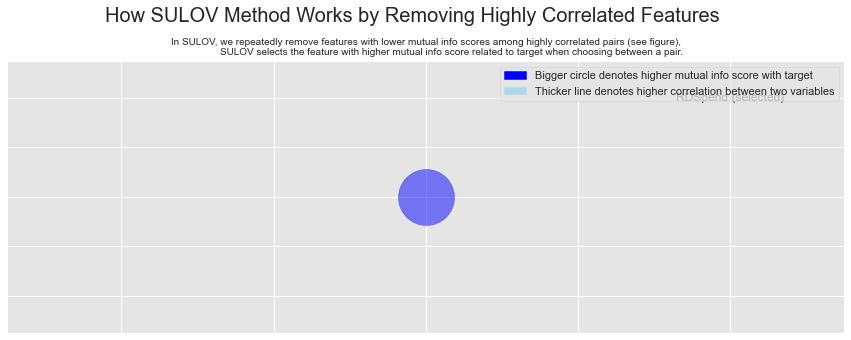

Time taken for SULOV method = 1 seconds
    Adding 0 categorical variables to reduced numeric variables  of 5
Final list of selected vars after SULOV = 5
Readying dataset for Recursive XGBoost by converting all features to numeric...
#######################################################################################
#####    R E C U R S I V E   X G B O O S T : F E A T U R E   S E L E C T I O N  #######
#######################################################################################
    using regular XGBoost
Train and Test loaded into Dask dataframes successfully after feature_engg completed
Current number of predictors = 5 
    XGBoost version: 1.6.0
Number of booster rounds = 100
        using 5 variables...
Regular XGBoost is crashing due to: dlsym(0x20b92db20, XGDMatrixCreateFromDense): symbol not found
dlsym(0x20b92db20, XGDMatrixCreateFromDense): symbol not found
Regular XGBoost is crashing due to local variable 'dtrain' referenced before assignment. Returning with curr

In [36]:
out1, out2 = featurewiz(data_with_dummies, 'Profit', corr_limit=0.7, verbose=0)

In [37]:
out2.head()

,Administration,MarketingSpend,State_Florida,State_NewYork,RDSpend,Profit
0,151377.59,443898.53,0,0,162597.70,191792.06
1,101145.55,407934.54,1,0,153441.51,191050.39
2,118671.85,383199.62,0,1,144372.41,182901.99
3,91391.77,366168.42,1,0,142107.34,166187.94
4,99814.71,362861.36,0,1,131876.90,156991.12


***
### Multiple linear regression


In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size = 0.2, random_state = 0)

In [39]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [40]:
reg_summary = pd.DataFrame(data = inputs.columns.values, columns=['Features'])
reg_summary ['Coefficients'] = regressor.coef_
reg_summary ['p-values'] = p_values.round(3)
reg_summary

,Features,Coefficients,p-values
0,R&D Spend,0.802272,0.000
1,Administration,0.016413,0.200
2,Marketing Spend,0.033307,0.000
3,State_Florida,-43.882285,0.299
4,State_New York,368.421188,0.851


In [41]:
y_hat_test = regressor.predict(X_test)

In [42]:
df_pf = pd.DataFrame(y_hat_test, columns=['Prediction'])

In [43]:
y_test = y_test.reset_index(drop=True)

In [44]:
df_pf['Target'] = y_test
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_pf.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
4,96682.00,96778.92,96.92,0.10
8,153260.42,152211.77,-1048.65,0.69
3,98225.33,97483.56,-741.77,0.76
0,97990.20,99937.59,1947.39,1.95
1,163257.92,156991.12,-6266.80,3.99
7,72566.54,77798.83,5232.29,6.73
9,133955.39,144259.40,10304.01,7.14
6,88889.56,96479.51,7589.95,7.87
2,115444.77,105008.31,-10436.46,9.94
5,67215.41,81229.06,14013.65,17.25


In [45]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print(f'''
MAE: {mean_absolute_error(y_test,y_hat_test)}
MSE: {mean_squared_error(y_test,y_hat_test)}
RMSE: {np.sqrt(mean_squared_error(y_test,y_hat_test))}
R2: {r2_score(y_test,y_hat_test)}
''')


MAE: 5767.78946082033
MSE: 54118330.7810428
RMSE: 7356.51621224631
R2: 0.9293690830612813



In [46]:
r2 = r2_score(y_test,y_hat_test)
n=40
k=2
adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
print(adj_r2_score)

0.9255511956591884


***
### Desicion Tree

In [47]:
data_with_dummies.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,162597.70,151377.59,443898.53,191792.06,0,0
1,153441.51,101145.55,407934.54,191050.39,1,0
2,144372.41,118671.85,383199.62,182901.99,0,1
3,142107.34,91391.77,366168.42,166187.94,1,0
4,131876.90,99814.71,362861.36,156991.12,0,1


In [48]:
y = data_with_dummies['Profit']
X = data_with_dummies.drop(['Profit'], axis=1)

In [49]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=1)

In [50]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(x_train, y_train)

DecisionTreeRegressor(random_state=0)

In [51]:
y_pred = regressor.predict(X_test)
y_pred

array([ 97427.84, 156991.12, 105008.31,  97427.84,  96778.92,  81229.06,
        96712.8 ,  77798.83, 152211.77, 144259.4 ])

In [52]:
r2_score(y_test, y_pred)

-0.784724111837499

In [53]:
import graphviz
from sklearn import tree
dot_data = tree.export_graphviz(regressor, out_file='tree.dot') 
# plt.figure(figsize=(12,10))
# tree.plot_tree(regressor);

In [54]:
data_with_dummies.drop(['Profit'], axis=1).columns.values

array(['R&D Spend', 'Administration', 'Marketing Spend', 'State_Florida',
       'State_New York'], dtype=object)

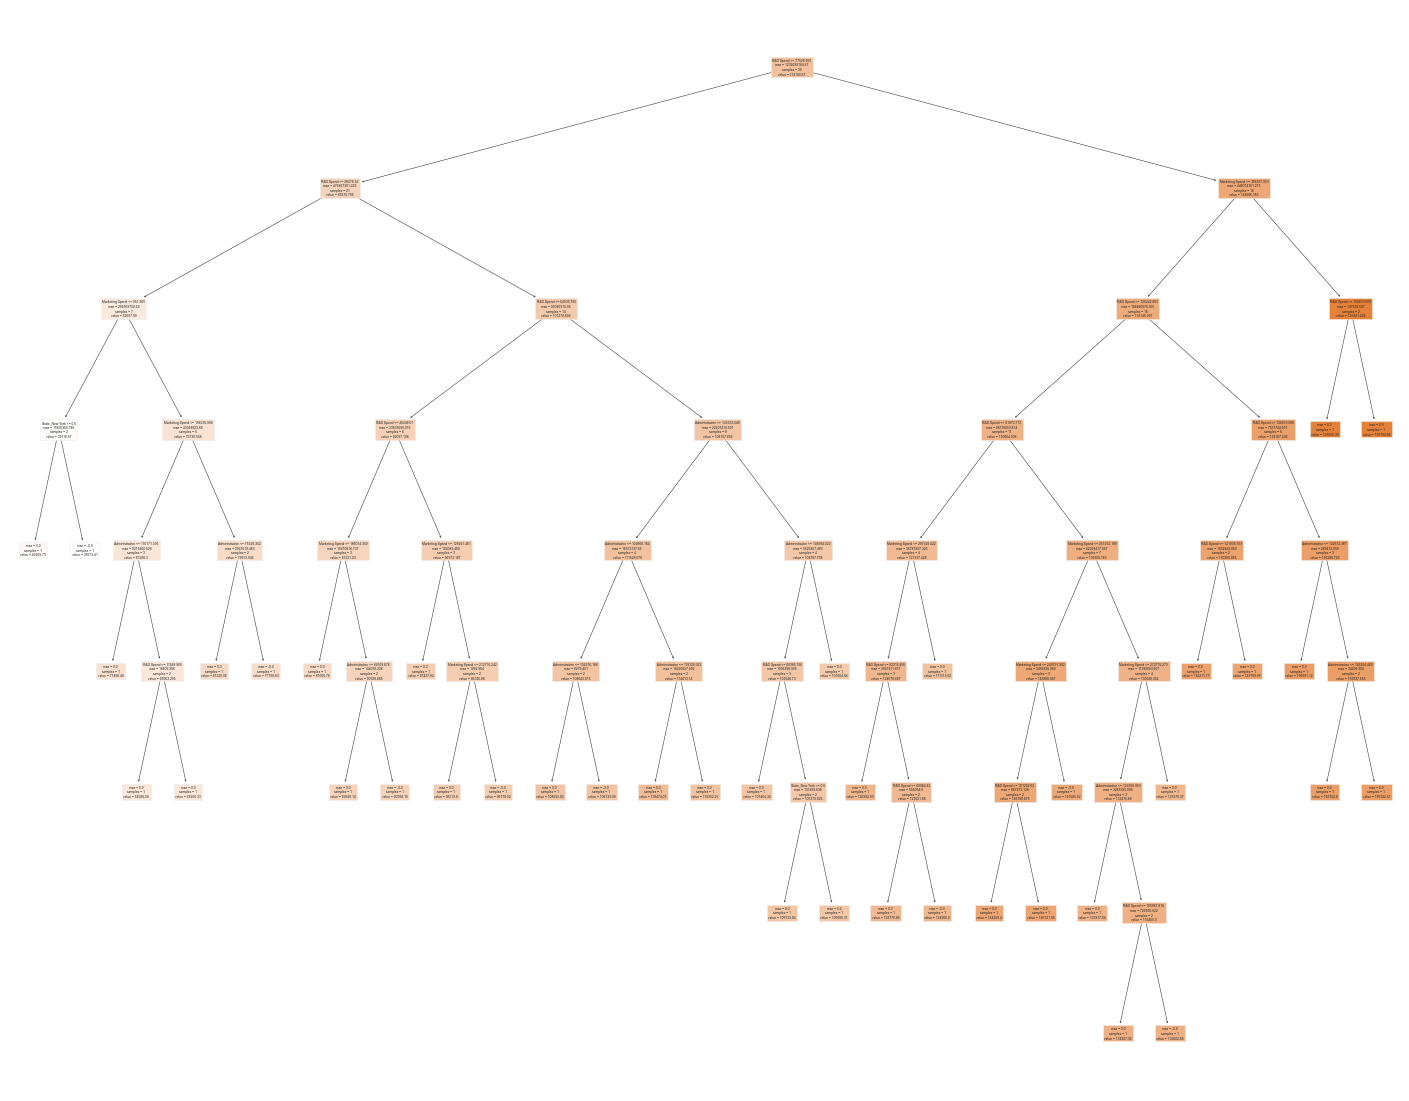

In [55]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(regressor, feature_names=data_with_dummies.drop(['Profit'], axis=1).columns.values, filled=True)

Decision tree model does not affect here well

***
### Support Vector Regresssion

In [56]:
y = data_with_dummies['Profit'].array.reshape(-1,1)
X = data_with_dummies.drop(['Profit'], axis=1)

In [57]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=1)

In [58]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
x_train = sc_x.fit_transform(X)
y_train = sc_y.fit_transform(y)

In [59]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

SVR()

In [60]:
y_pred = sc_y.inverse_transform(regressor.predict(sc_x.transform(x_test)))
y_pred

array([4.14655745e+09, 4.14655745e+09, 4.14655745e+09, 4.14655745e+09,
       4.14655745e+09, 4.14655745e+09, 4.14655745e+09, 4.14655745e+09,
       4.14655745e+09, 4.14655745e+09])

In [61]:
r2_score(y_test, y_pred)

-7699962782.174147

SVM model does not affect here well

***

### Random Forest

In [62]:
y = data_with_dummies['Profit'].array.reshape(-1,1)
X = data_with_dummies.drop(['Profit'], axis=1)

In [63]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=1)

In [64]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=7, random_state=0)
regressor.fit(x_train, y_train)

RandomForestRegressor(n_estimators=7, random_state=0)

In [65]:
y_pred = regressor.predict(x_test)
y_pred

array([101169.22571429,  95501.88142857,  81965.58857143,  59502.79714286,
       175296.45      , 169610.10571429,  67322.44285714,  97938.81142857,
        67364.90857143,  98449.78285714])

In [66]:
r2_score(y_test, y_pred)

0.891254401510474